In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [14]:
df = pd.read_csv('Customer Churn.csv')

In [15]:
df.info()
display(df.head(3500))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,0,no,16,0,1200,19,12,9,2,pre-paid,active,25,108.855,yes
3146,3147,9,no,15,0,5897,134,69,37,1,post-paid,active,15,711.205,yes
3147,3148,5,no,13,0,8437,164,57,35,4,pre-paid,active,45,357.525,yes
3148,3149,1,no,14,2,2357,38,15,14,3,pre-paid,active,30,155.800,yes


In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

None

In [17]:
complainsDF=pd.get_dummies(df.Complains,prefix='Complains')
planDF=pd.get_dummies(df.Plan ,prefix='Plan')
statusDF=pd.get_dummies(df.Status, prefix='Status')
churnDF=pd.get_dummies(df.Churn,prefix='Churn')
dfScaledCats = pd.concat([df, complainsDF,planDF,statusDF,churnDF], axis='columns')
df_final = dfScaledCats.drop(columns=['Plan','Status','Churn','Complains'])
display(df_final.describe())

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916,0.923492,0.076508,0.077778,0.922222,0.751746,0.248254,0.157143,0.842857
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433,0.265851,0.265851,0.267864,0.267864,0.432069,0.432069,0.363993,0.363993
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


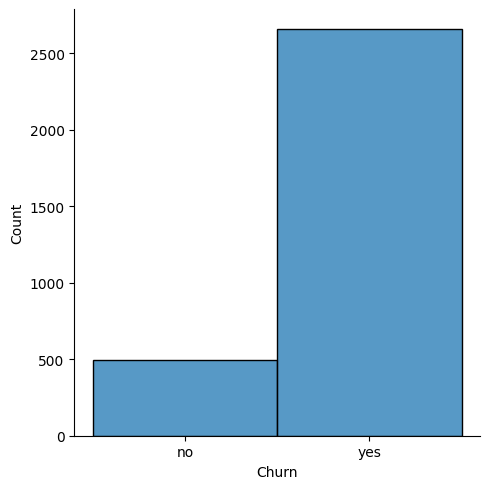

In [18]:
sns.displot(df['Churn'])

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Churn Count')]

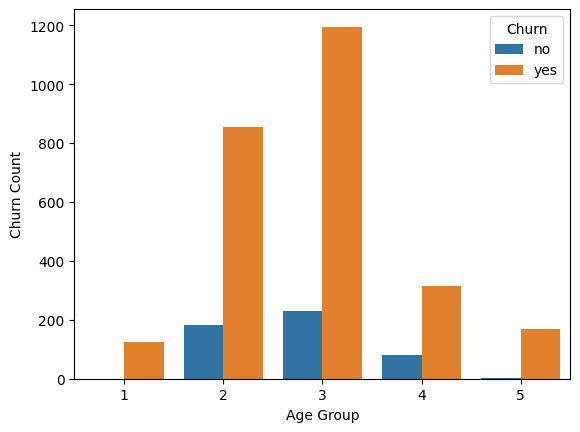

In [19]:
sns.countplot(data=df, x="Age Group", hue="Churn").set(xlabel='Age Group', ylabel='Churn Count')

[Text(0.5, 0, 'Charge Amount'), Text(0, 0.5, 'Churn Count')]

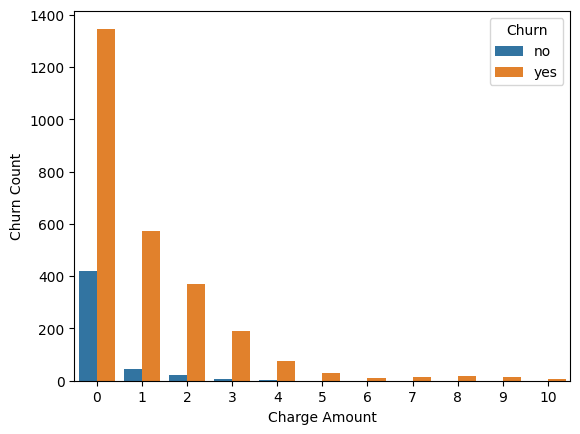

In [20]:
sns.countplot(data=df, x="Charge Amount", hue="Churn").set(xlabel='Charge Amount', ylabel='Churn Count')

,Charge Amount
count,3150.000000
mean,0.942857
std,1.521072
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


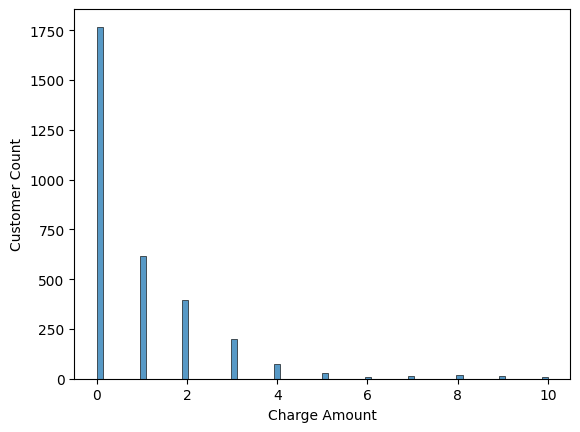

In [21]:
sns.histplot(data=df, x="Charge Amount").set(xlabel='Charge Amount', ylabel='Customer Count')

charge=df[["Charge Amount"]]
(charge.describe())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [23]:
dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_8434/1441392740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
/tmp/ipykernel_8434/1441392740.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
ID,1.00,-0.11,-0.05,-0.03,-0.02,-0.02,0.01,-0.00,-0.03,-0.02,0.01,0.00,-0.00,0.01,-0.01,-0.01,0.01,0.00,-0.00
Call Failure,-0.11,1.00,0.17,0.59,0.50,0.57,-0.02,0.50,0.05,0.04,0.12,-0.15,0.15,0.19,-0.19,0.11,-0.11,-0.01,0.01
Subscription Length,-0.05,0.17,1.00,0.08,0.12,0.11,0.08,0.09,0.02,-0.00,0.11,0.02,-0.02,-0.16,0.16,-0.14,0.14,-0.03,0.03
Charge Amount,-0.03,0.59,0.08,1.00,0.45,0.38,0.09,0.42,0.28,0.28,0.17,0.03,-0.03,0.32,-0.32,0.36,-0.36,-0.20,0.20
Seconds of Use,-0.02,0.50,0.12,0.45,1.00,0.95,0.10,0.68,0.02,0.02,0.42,0.10,-0.10,0.13,-0.13,0.46,-0.46,-0.30,0.30
Freq. of use,-0.02,0.57,0.11,0.38,0.95,1.00,0.10,0.74,-0.03,-0.03,0.40,0.09,-0.09,0.21,-0.21,0.45,-0.45,-0.30,0.30
Freq. of SMS,0.01,-0.02,0.08,0.09,0.10,0.10,1.00,0.08,-0.05,-0.09,0.92,0.11,-0.11,0.20,-0.20,0.30,-0.30,-0.22,0.22
Distinct Called Numbers,-0.00,0.50,0.09,0.42,0.68,0.74,0.08,1.00,0.02,0.05,0.28,0.06,-0.06,0.17,-0.17,0.41,-0.41,-0.28,0.28
Age Group,-0.03,0.05,0.02,0.28,0.02,-0.03,-0.05,0.02,1.00,0.96,-0.18,-0.02,0.02,-0.15,0.15,-0.00,0.00,-0.01,0.01
Age,-0.02,0.04,-0.00,0.28,0.02,-0.03,-0.09,0.05,0.96,1.00,-0.22,-0.00,0.00,-0.12,0.12,0.00,-0.00,-0.02,0.02


,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,0.500000,0.211887,0.671407,0.094286,0.261700,0.272395,0.140182,0.242369,0.456508,0.399960,0.217511,0.923492,0.076508,0.077778,0.922222,0.751746,0.248254,0.157143,0.842857
std,0.288813,0.201775,0.194852,0.152107,0.245635,0.225150,0.215014,0.177498,0.223139,0.220777,0.238775,0.265851,0.265851,0.267864,0.267864,0.432069,0.432069,0.363993,0.363993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.027778,0.613636,0.000000,0.081407,0.105882,0.011494,0.103093,0.250000,0.250000,0.052557,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,0.500000,0.166667,0.727273,0.000000,0.174956,0.211765,0.040230,0.216495,0.500000,0.375000,0.105520,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.750000,0.333333,0.795455,0.100000,0.379067,0.372549,0.166667,0.350515,0.500000,0.375000,0.364105,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Customer Value
count,2520.000000
mean,0.218120
std,0.239105
min,0.000000
25%,0.052708
50%,0.105600
75%,0.365191
max,0.992611


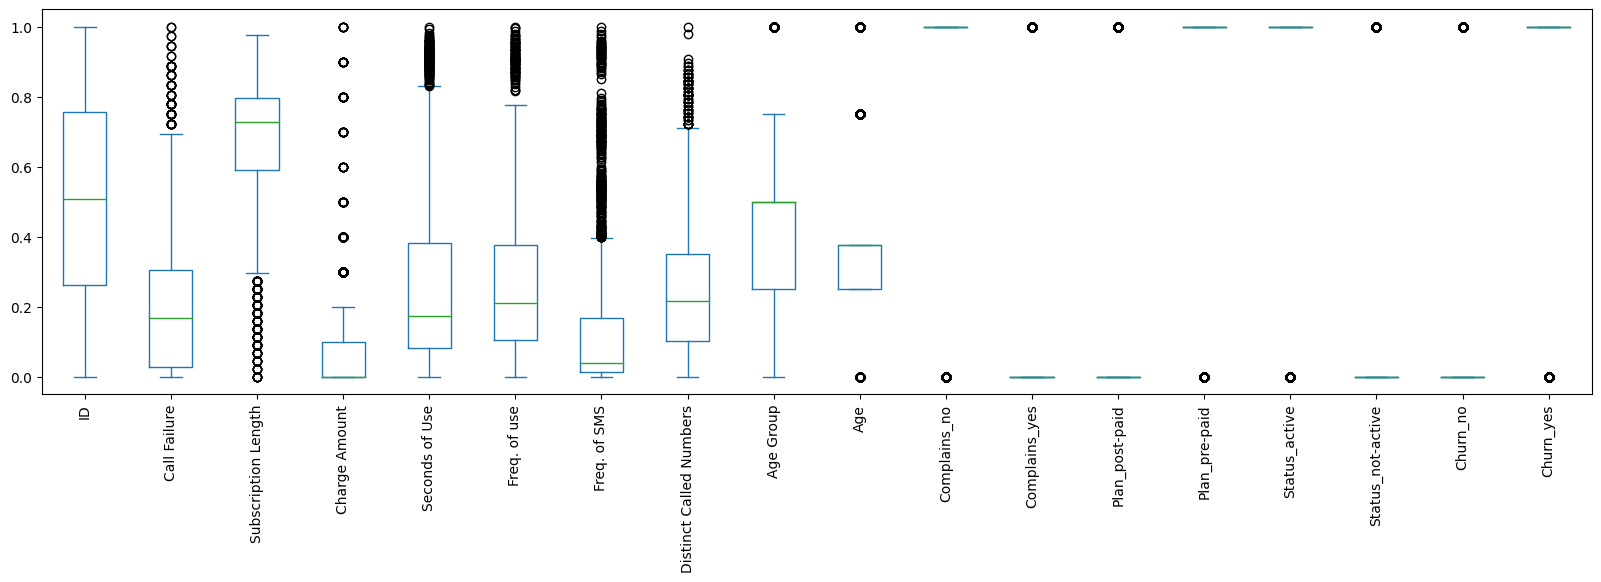

In [24]:
df_norm= MinMaxScaler().fit(df_final)
df_final_normalized = df_norm.transform(df_final)
df_final_normalized = pd.DataFrame(df_final_normalized, columns=df_final.columns)

display(df_final_normalized.describe())

x= df_final_normalized.drop(columns=['Customer Value'])
y= df_final_normalized[["Customer Value"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
#X_train.plot.box(figsize=(20,5), rot=90)

X_train.plot.box(figsize=(20,5), rot=90)
y_train.describe()

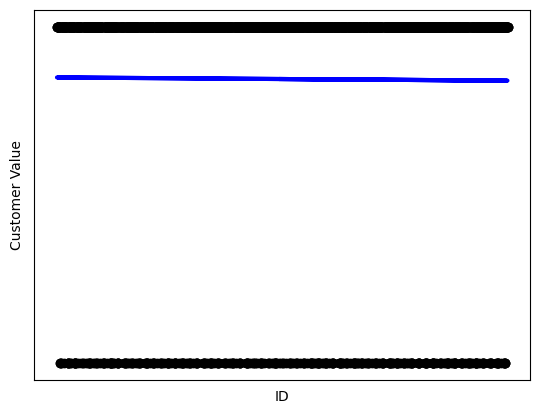

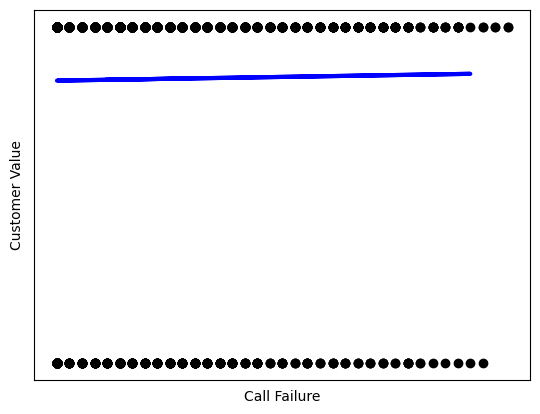

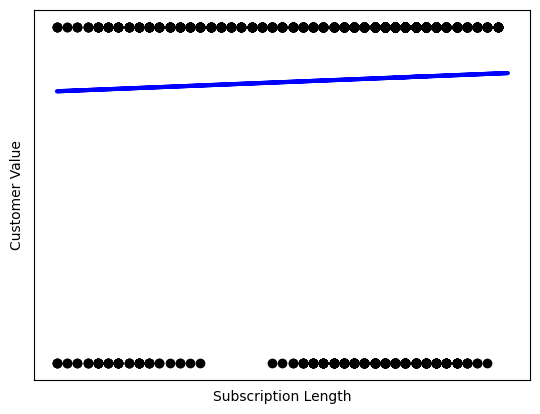

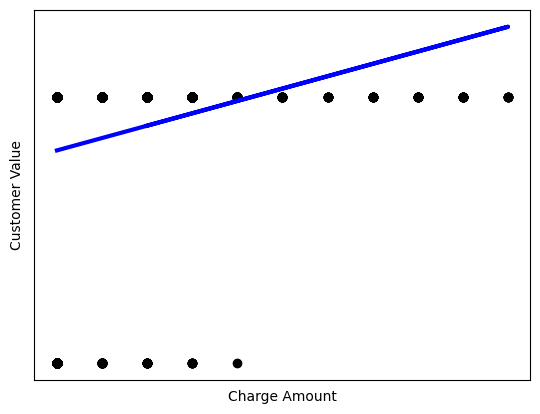

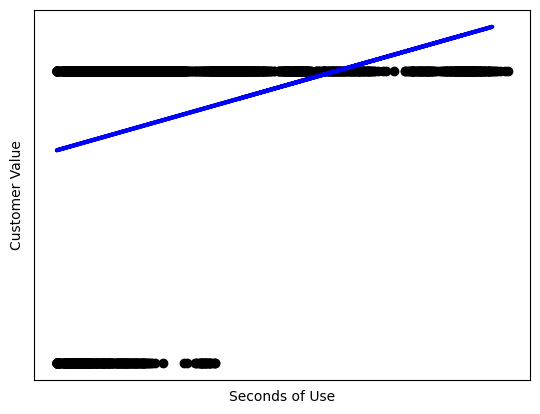

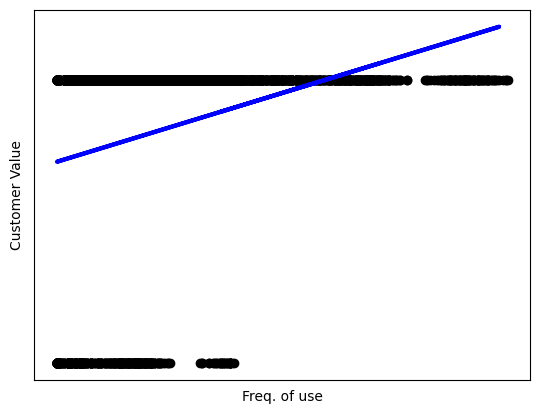

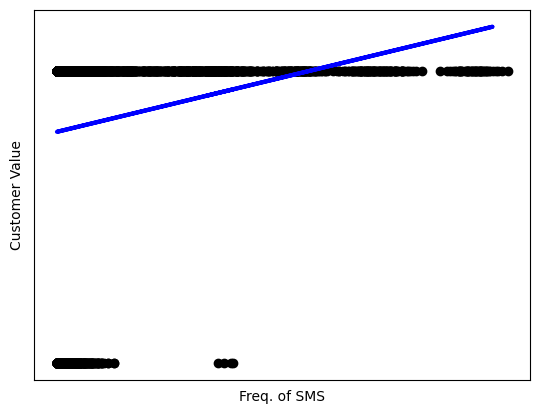

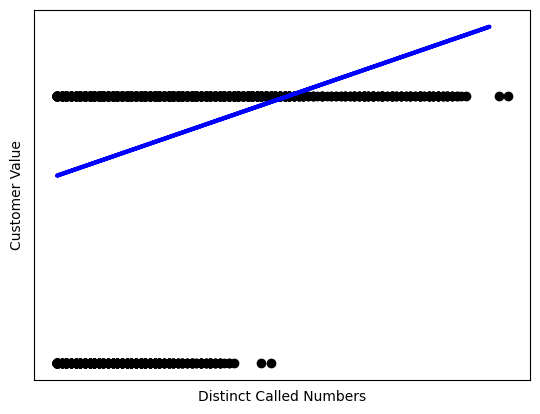

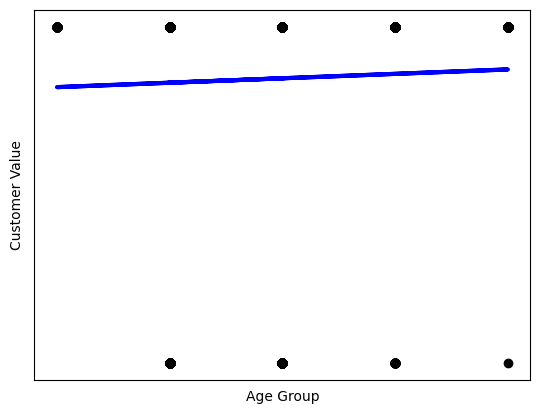

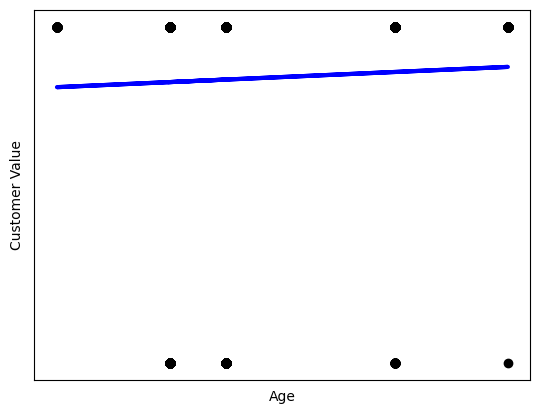

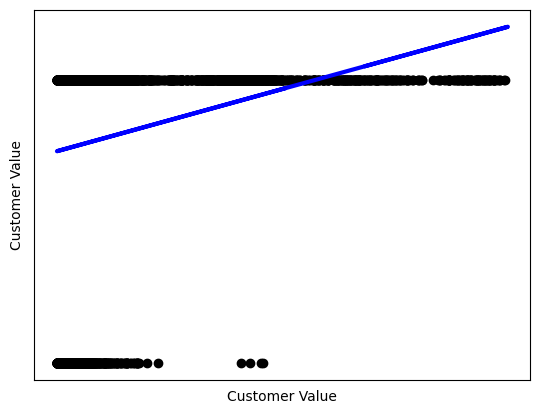

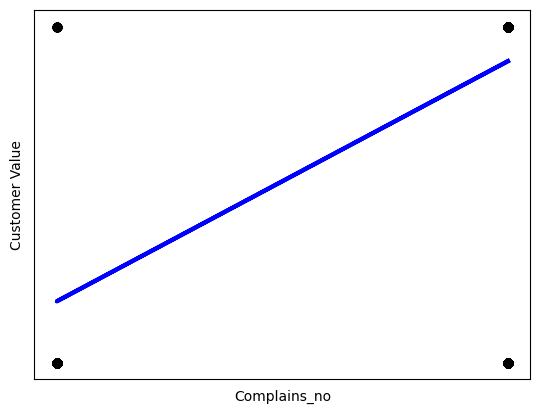

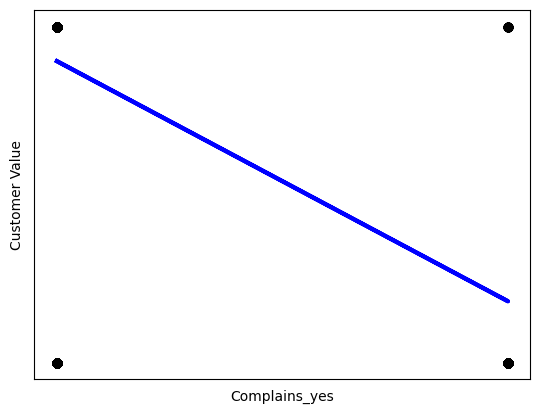

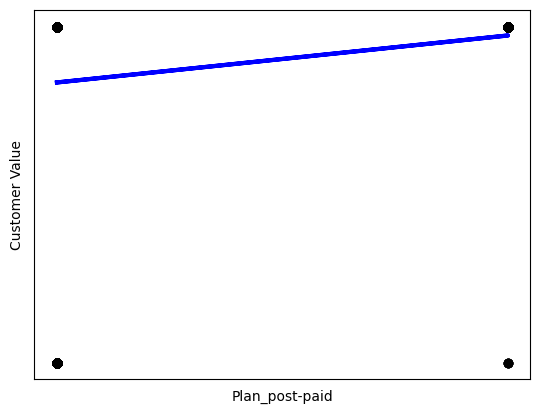

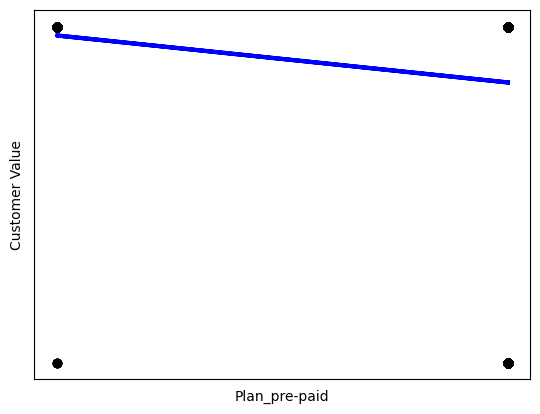

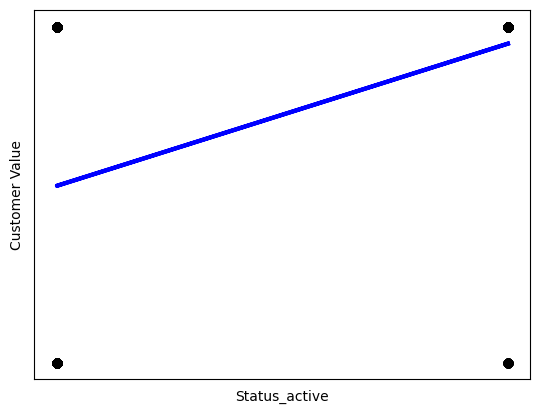

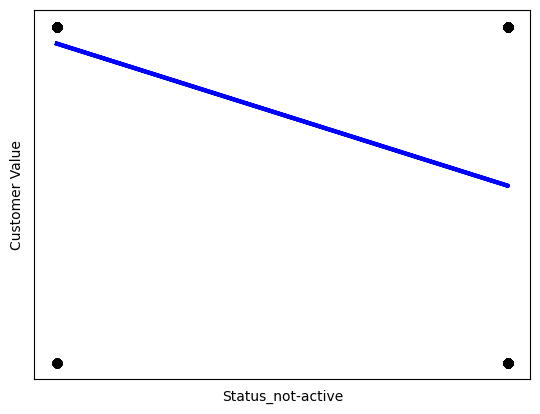

In [28]:
regr = linear_model.LinearRegression()

for key in x.keys():
    X_DF=X_train[[key]]
    regr.fit(X_DF, y_train)
    plt.scatter(X_DF, y_train, color='black')
    plt.plot(X_test[[key]], regr.predict(X_test[[key]]), color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(key)
    plt.ylabel("Customer Value")
    plt.show()

In [29]:
regr = linear_model.LinearRegression()
LRM1=regr.fit(X_train, y_train)
y_pred_LRM1 = regr.predict(X_test)
mse=[]
mae=[]
re=[]
mse.append(mean_squared_error(y_test, y_pred_LRM1)) 
mae.append(mean_absolute_error(y_test, y_pred_LRM1)) 
re.append(r2_score(y_test, y_pred_LRM1)) 

LRM2=regr.fit(X_train[['Subscription Length', 'Freq. of use', 'Status_active']], y_train)
y_pred_LRM2 = regr.predict(X_test[['Subscription Length', 'Freq. of use', 'Status_active']])
mse.append(mean_squared_error(y_test, y_pred_LRM2)) 
mae.append(mean_absolute_error(y_test, y_pred_LRM2)) 
re.append(r2_score(y_test, y_pred_LRM2)) 

LRM3=regr.fit(X_train[['Freq. of SMS','Freq. of use','Seconds of Use']], y_train)
y_pred_LRM3 = regr.predict(X_test[['Freq. of SMS','Freq. of use','Seconds of Use']])
mse.append(mean_squared_error(y_test, y_pred_LRM3)) 
mae.append(mean_absolute_error(y_test, y_pred_LRM3))
re.append(r2_score(y_test, y_pred_LRM3)) 

    

df_svr = pd.DataFrame({'Mean Squared Error': mse,'Mean Absolute Error': mae, 'R^2 Score': re}, index=['LRM1', 'LRM2', 'LRM3'])
df_svr

,Mean Squared Error,Mean Absolute Error,R^2 Score
LRM1,0.072816,0.166225,0.467571
LRM2,0.102734,0.203574,0.248812
LRM3,0.120317,0.260968,0.120251


/home/datablock/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Predicted Negative,Predicted Positive
Actual Negative,73,30
Actual Positive,15,512


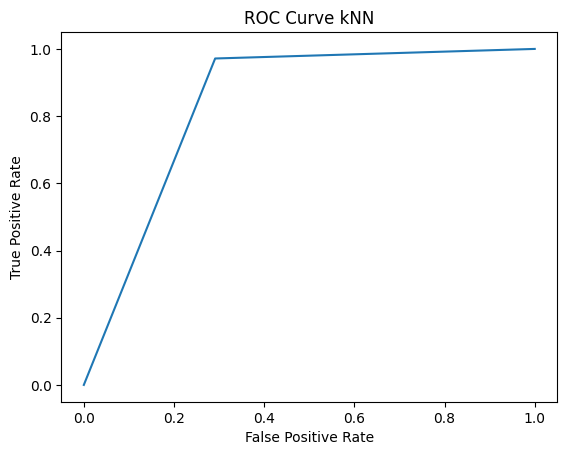

/home/datablock/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Predicted Negative,Predicted Positive
Actual Negative,92,11
Actual Positive,129,398


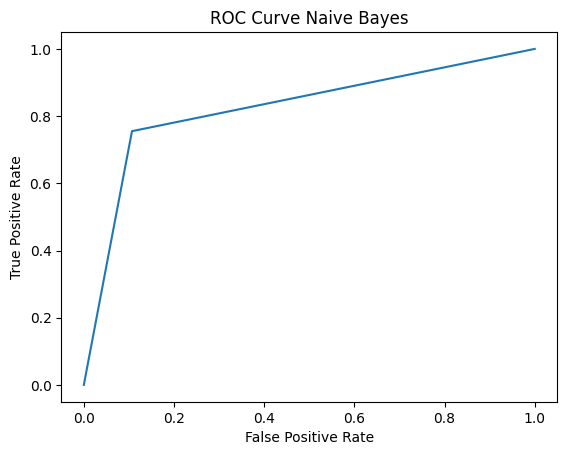

/home/datablock/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Predicted Negative,Predicted Positive
Actual Negative,48,55
Actual Positive,11,516


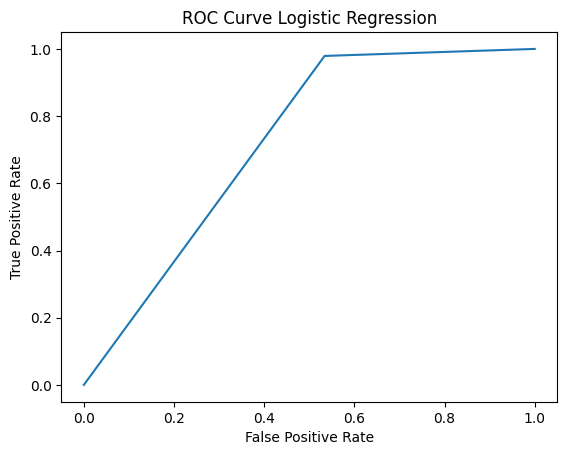

,ROC_AUC_SCORE,Accuracy
kNN,0.840137,0.928571
Naive Bayes,0.824211,0.777778
Logistic Regression,0.722573,0.895238


In [31]:
from sklearn.metrics import accuracy_score
df_norm= MinMaxScaler().fit(df_final)
df_final_normalized = df_norm.transform(df_final)
df_final_normalized = pd.DataFrame(df_final_normalized, columns=df_final.columns)
x= df_final_normalized.drop(columns=['Churn_yes','Churn_no'])
y= df_final_normalized[["Churn_yes"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
scores = []
accuracies= []
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

roc_accuracy_kNN = roc_auc_score(y_test, y_pred, multi_class='ovr')
accuracy_KNN = accuracy_score(y_test, y_pred)
scores.append(roc_accuracy_kNN)
accuracies.append(accuracy_KNN)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

confMat = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
display(confMat)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve kNN')
plt.show()

clf = GaussianNB()

# Train the classifier with training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

roc_accuracy_NB = roc_auc_score(y_test, y_pred, multi_class='ovr')
accuracy_NB = accuracy_score(y_test, y_pred)
scores.append(roc_accuracy_NB)
accuracies.append(accuracy_NB)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

confMat = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
display(confMat)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naive Bayes')
plt.show()

clf = LogisticRegression()

# Train the classifier with training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

roc_accuracy_LR = roc_auc_score(y_test, y_pred, multi_class='ovr')
accuracy_LR = accuracy_score(y_test, y_pred)
scores.append(roc_accuracy_LR)
accuracies.append(accuracy_LR)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

confMat = pd.DataFrame(confusion_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
display(confMat)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.show()

df_acc = pd.DataFrame({'ROC_AUC_SCORE': scores,'Accuracy': accuracies}, index=['kNN', 'Naive Bayes', 'Logistic Regression'])
df_acc
